Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [47]:
NAME = "ASHLEY BIRKIN"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.**
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting).

5. _(2 points)_ **Prepare the data for classification**.
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part.
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [48]:

!pip install matplotlib-venn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## IMPORT DATA

In [49]:
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])


## DATAFRAME COMBINATION

In [50]:
iris_data = pd.concat([df_data, df_target["target"]], axis = 1)
print(iris_data)


iris_data.head(5)
iris_data.describe()
iris_data.info()

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  --

## SCATTER PLOT - SEPAL WIDTH VS. SEPAL LENGTH



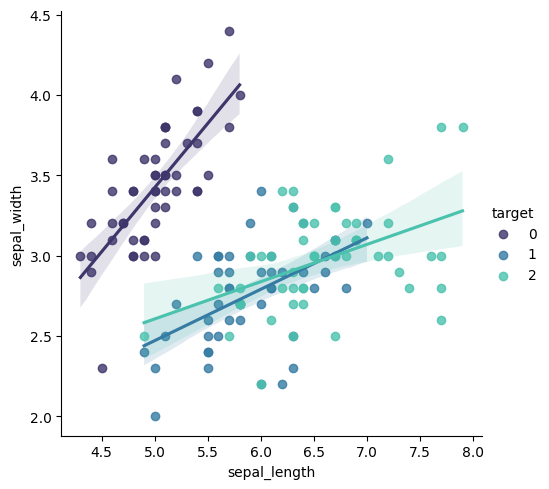

In [51]:
sns.lmplot(iris_data, x="sepal_length", y="sepal_width", hue="target", palette="mako")
plt.show()

## SCATTER PLOT - PETAL WIDTH VS. PETAL LENGTH


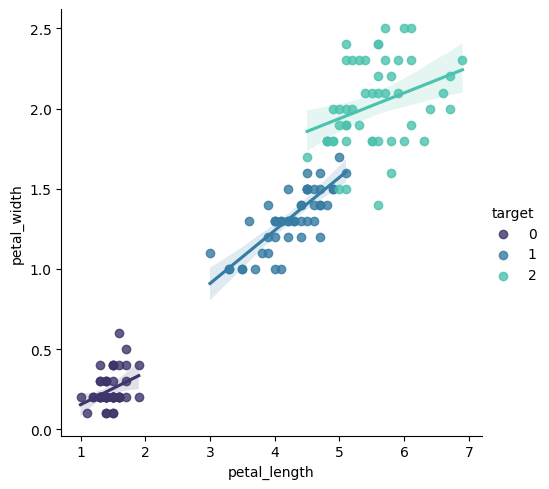

In [52]:
sns.lmplot(iris_data, x="petal_length", y="petal_width", hue="target", palette="mako")
plt.show()

## DATA PREPERATION FOR CLASSIFICATION

In [53]:
from sklearn.preprocessing import StandardScaler

iris_data.dropna(inplace=True)

X=iris_data.drop("target", axis=1)
y=iris_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Test:", y_test)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)

Test: 73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int64
(120, 4) (30, 4)
(120,) (30,)


## TRAIN & TEST SPLIT

## KNEIGHBORSCLASSIFIER FIT

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Predictions:", y_pred)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## ACCURACY SCORE

In [55]:
accuracy = knn.score(X_test_scaled, y_test)

print(f"Accuracy: {accuracy}" )

Accuracy: 1.0


## ARRAY COMPARISON

In [56]:
y_test_array = y_test.to_numpy()

print(y_test_array)


correct_pred = np.sum(y_pred == y_test)
incorrect_pred = np.sum(y_pred != y_test)

print(f"Correct predictions: {correct_pred}")
print(f"Incorrect predictions: {incorrect_pred}")

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Correct predictions: 30
Incorrect predictions: 0


In [57]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.061667,3.726667,1.183333
std,0.823805,0.449123,1.752345,0.752289
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


## 10 RANDOM TRAIN/TEST SPLITS

In [58]:
from sklearn.model_selection import GridSearchCV


X=iris_data.drop("target", axis=1)
y=iris_data["target"]

k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]

knn = KNeighborsClassifier()

param_grid = {"n_neighbors": k_values}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring="accuracy")

grid_search.fit(X, y)

print("best k value: ", grid_search.best_params_)
print("best accuracy: ", grid_search.best_score_)

for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
  k = params["n_neighbors"]
  print(f"k={k}=> mean accuracy: {mean_score:.4f}")


best k value:  {'n_neighbors': 20}
best accuracy:  0.9800000000000001
k=1=> mean accuracy: 0.9600
k=3=> mean accuracy: 0.9667
k=5=> mean accuracy: 0.9667
k=7=> mean accuracy: 0.9667
k=10=> mean accuracy: 0.9667
k=20=> mean accuracy: 0.9800
k=30=> mean accuracy: 0.9533
k=40=> mean accuracy: 0.9533
k=50=> mean accuracy: 0.9267


## PREDICTION MODEL

In [59]:
results = grid_search.cv_results_

random_df = pd.DataFrame({"k":[params["n_neighbors"] for params in results["params"]],"mean_accuracy": results["mean_test_score"]})

print(random_df)


    k  mean_accuracy
0   1       0.960000
1   3       0.966667
2   5       0.966667
3   7       0.966667
4  10       0.966667
5  20       0.980000
6  30       0.953333
7  40       0.953333
8  50       0.926667


## ACCURACY SCORE PLOT

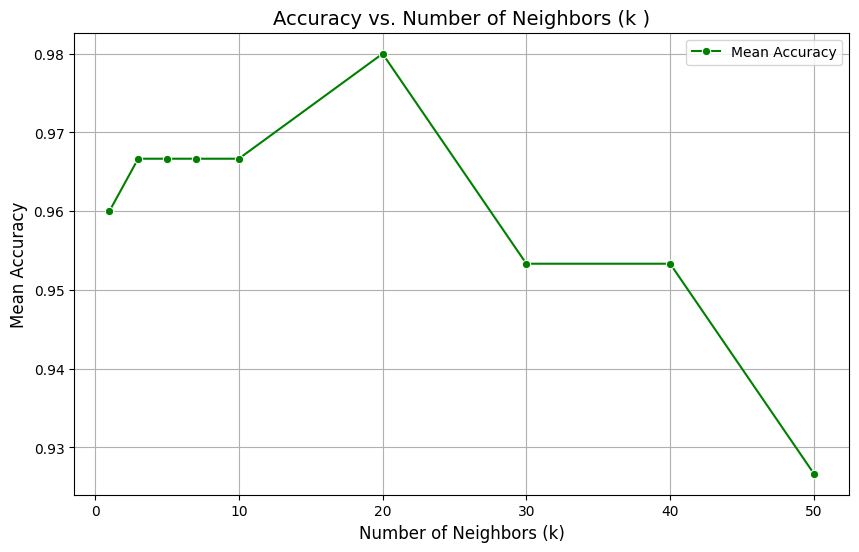

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="k", y="mean_accuracy", data=random_df, marker="o", label="Mean Accuracy", c="green")

plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.title("Accuracy vs. Number of Neighbors (k )", fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

